In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
#df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/housing_price_eda.csv")
df=pd.read_csv("dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   uid                1048575 non-null  int64  
 1   asin               1048575 non-null  object 
 2   title              1048575 non-null  object 
 3   stars              1048575 non-null  float64
 4   reviews            1048575 non-null  int64  
 5   price              1048575 non-null  float64
 6   isBestSeller       1048575 non-null  bool   
 7   boughtInLastMonth  1048575 non-null  int64  
 8   category           1048575 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 65.0+ MB


In [6]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [7]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [8]:
df.sample(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
863474,940260,B0CD6FTZFP,"HD Laptop Monitor, Eye Care Refresh Rate 144Hz...",0.0,0,238.59,False,0,Monitors
758716,819002,B0BKQBP9BH,"20”,24”,26”,27.5”,28”,29”,700c Inch E-Bike Con...",0.0,0,438.41,False,0,Sports & Outdoors
241260,257412,B09Q8RPVB4,"Bird Feeder House, Hanging Bird Feeder Table F...",1.6,6,14.39,False,0,Bird & Wildlife Care
306958,325154,B0064BPHD4,Gaugemaster PM-1 Seep Point Motor with Built-I...,4.5,207,7.25,False,0,Hobbies
855550,931557,B0BZL332KV,"2Pcs Inflatable Armbands, Jagowa Roll Up Swimm...",4.6,5,5.49,False,0,Sports Toys & Outdoor
881738,959347,B0925HJMH3,ASEKER Compatible Toner Cartridge for Xerox Ph...,3.6,28,29.80,False,0,Printers & Accessories
830554,905690,B0C5JXTZXV,Girls Girls Girls - Fancy A Night In? - Hen Pa...,4.2,9,7.99,False,50,Games & Game Accessories
640682,689377,B09L6BK3X7,"Classic French Red & White Wine Gift Box, 2 x ...",0.0,0,36.00,False,0,"Beer, Wine & Spirits"
363020,387893,B0C597GT34,Sport Heavy Duty Free Standing Boxing Punch Ba...,3.6,12,13.00,False,0,Sports & Outdoors
892612,971508,B0CJ5MJNRB,2024 Men's Ice Silk Quick Drying Clothes Men's...,0.0,0,2.81,False,0,Sports & Outdoors


### Exploring numerical and categorical variables

In [9]:
num=df.select_dtypes(include="number")
cat=df.select_dtypes(exclude="number")

In [10]:
num.nunique().sort_values(ascending=False)

uid                  1048575
price                  50386
reviews                12171
stars                     41
boughtInLastMonth         24
dtype: int64

In [11]:
#potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
#potential_categorical_from_numerical

In [12]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [13]:
df.price.value_counts() # or df['PoolQC'] to select column

price
9.99      20406
12.99     17054
14.99     14905
8.99      14018
7.99      13477
          ...  
194.83        1
786.29        1
212.90        1
353.31        1
149.29        1
Name: count, Length: 50386, dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.eq(' ').sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

### Part 1: Understanding Product Categories
### Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

#### Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [16]:
cat.head()

,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers


In [17]:
num.head()

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


In [18]:
cat.columns

Index(['asin', 'title', 'isBestSeller', 'category'], dtype='object')

In [19]:
frequency_table=cat.category.value_counts()

In [20]:
frequency_table

category
Sports & Outdoors               414834
Bath & Body                      19092
Birthday Gifts                   18978
Manicure & Pedicure Products     18940
Skin Care                        18769
                                 ...  
Motorbike Chassis                   93
Smart Speakers                      46
eBook Readers & Accessories         24
Light Bulbs                         23
Lighting                            16
Name: count, Length: 141, dtype: int64

In [21]:
# Get the top 5 most listed categories
top_categories = frequency_table.nlargest(5)

In [22]:
top_categories 

category
Sports & Outdoors               414834
Bath & Body                      19092
Birthday Gifts                   18978
Manicure & Pedicure Products     18940
Skin Care                        18769
Name: count, dtype: int64

In [23]:
proportion_table=cat.category.value_counts(normalize=True)

In [24]:
proportion_table

category
Sports & Outdoors               0.395617
Bath & Body                     0.018208
Birthday Gifts                  0.018099
Manicure & Pedicure Products    0.018063
Skin Care                       0.017900
                                  ...   
Motorbike Chassis               0.000089
Smart Speakers                  0.000044
eBook Readers & Accessories     0.000023
Light Bulbs                     0.000022
Lighting                        0.000015
Name: proportion, Length: 141, dtype: float64

In [25]:
df2=pd.concat([frequency_table,proportion_table],axis=1)

In [26]:
df2

,count,proportion
category,,
Sports & Outdoors,414834,0.395617
Bath & Body,19092,0.018208
Birthday Gifts,18978,0.018099
Manicure & Pedicure Products,18940,0.018063
Skin Care,18769,0.017900
...,...,...
Motorbike Chassis,93,0.000089
Smart Speakers,46,0.000044
eBook Readers & Accessories,24,0.000023


In [27]:
frequency_table.reset_index()

,category,count
0,Sports & Outdoors,414834
1,Bath & Body,19092
2,Birthday Gifts,18978
3,Manicure & Pedicure Products,18940
4,Skin Care,18769
...,...,...
136,Motorbike Chassis,93
137,Smart Speakers,46
138,eBook Readers & Accessories,24
139,Light Bulbs,23


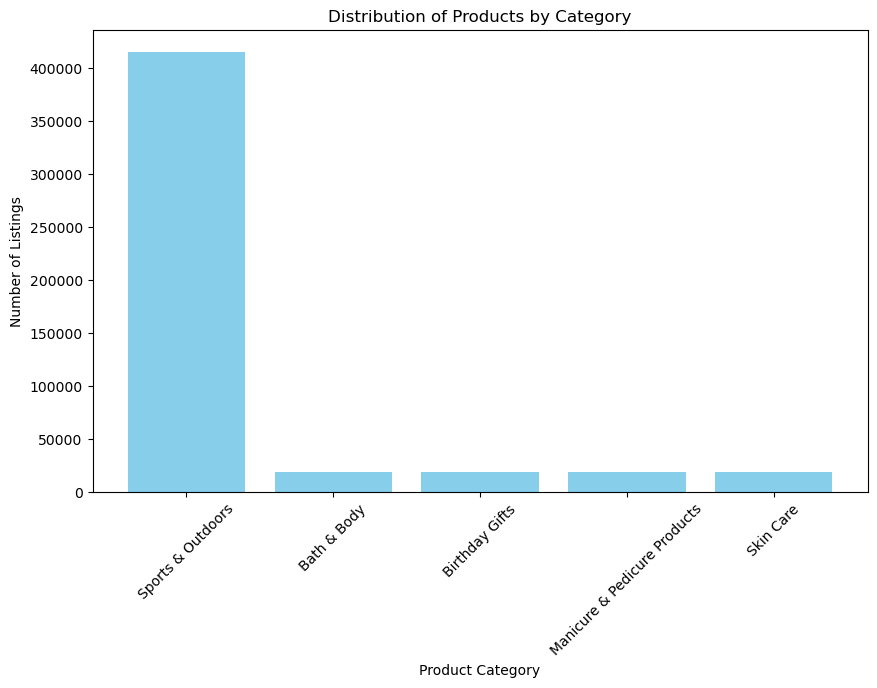

In [28]:
#sns.barplot(x=frequency_table, y=frequency_table.values, palette="Set2")
# Create a bar chart for the distribution of products
plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, top_categories.values, color='skyblue')
plt.xlabel("Product Category")
plt.ylabel("Number of Listings")
plt.title("Distribution of Products by Category")
plt.xticks(rotation=45)
plt.show()

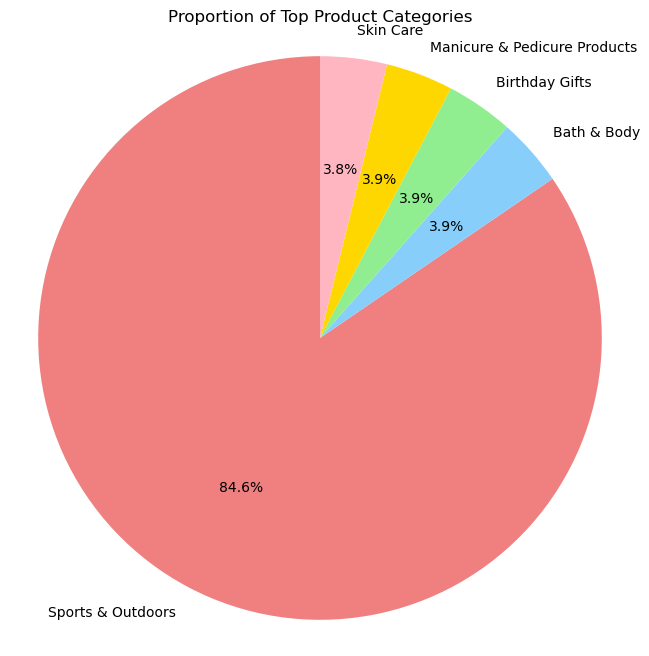

In [29]:
# Create a pie chart for the top categories
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
plt.title("Proportion of Top Product Categories")
plt.axis('equal')
plt.show()

### Part 2: Delving into Product Pricing### 
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [30]:
num.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
uid,1048575.0,568105.0,332287.0,1.0,278786.0,564745.0,847462.0,1158206.0
stars,1048575.0,2.0,2.0,0.0,0.0,0.0,4.0,5.0
reviews,1048575.0,334.0,3280.0,0.0,0.0,0.0,39.0,503952.0
price,1048575.0,79.0,275.0,0.0,10.0,19.0,45.0,22933.0
boughtInLastMonth,1048575.0,18.0,176.0,0.0,0.0,0.0,0.0,50000.0


**Insights** from Summary Statistics for 'Price':
Measures of Centrality:
- 
Mean: The mean price of products is £7
  9- .
Median: The median price of products is £
  1- 9.
Mode: The mode indicates the most common price p.
  int.
Measures of Disper
vided.
Standard Deviation: The standard deviation for product prices 
  is £275.
Range: The range for product prices is from £0 to
  
£22,933.
Interquartile Range (IQR): The interquartile range for product prices is from £10 to £45.

In [31]:
mean_price =num.price.mean()

mean_price

In [32]:
num.price.mode()

0    9.99
Name: price, dtype: float64

In [33]:
num.price.var()

75565.9304016307

In [34]:
##price_values = np.random.normal(loc=mean_price, scale=df.loc['price', 'std'], size=1000)  # Creating a sample of product prices

### Measures of Dispersion

In [35]:
num.price.quantile([0.3d]).reset_index()

SyntaxError: invalid decimal literal (3599610376.py, line 1)

### Shape of the Distribution
Skewness and kurtosis provide insights into the shape of the data distribution. Skewness indicates the asymmetry, and kurtosis tells about the "tailedness" or how peaked the distribution is.

In [ ]:
num.price.skew().round(2)

- Skewness = 0: The distribution is perfectly symmetrical, resembling a normal distribution.
- Skewness > 0: The distribution is positively skewed (or right-skewed), meaning there is a longer tail on the right side of the distribution. The mass of the distribution is concentrated on the left of the figure.
- Skewness < 0: The distribution is negatively skewed (or left-skewed), meaning there is a longer tail on the left side of the distribution. The mass of the distribution is concentrated on the right of the figure.

In [ ]:
num.price.kurtosis().round(2)

- Excess Kurtosis = 0 (or Kurtosis = 3): The distribution has the same kurtosis as a normal distribution, known as mesokurtic. It indicates a distribution with tails similar to the normal distribution.
- Excess Kurtosis > 0 (or Kurtosis > 3): The distribution is leptokurtic. It has fatter tails and a sharper peak than the normal distribution, indicating more extreme values (outliers) than expected in a normal distribution.
- Excess Kurtosis < 0 (or Kurtosis < 3): The distribution is platykurtic. It has thinner tails and a flatter peak than the normal distribution, indicating fewer extreme values than expected in a normal distribution.

- Skewness of 'SalePrice': \(14.08\)
- Kurtosis of 'SalePrice': \(401.59\)

**Insights**:

1. **Skewness**: The positive value of skewness (14.08) for the 'Price' indicates that the distribution is right-skewed. This means that the tail on the right side (higher prices) is longer than the left side (lower prices). In practical terms, this suggests that there are a significant number of Products that are sold at higher prices, which are acting as outliers and pulling the mean upwards.
  
2. **Kurtosis**: The kurtosis value of 401.59 is greater than 3, which indicates that the 'Price' distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in the 'Price' than one would expect in a normally distributed set.

The skewness and kurtosis values suggest that there are some houses that are sold at significantly higher prices than the majority, and these are affecting the overall distribution of house prices in the dataset.

#### Visualizations

Visual tools like histograms and box plots offer insights into the distribution, variability, and potential outliers in numerical data

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

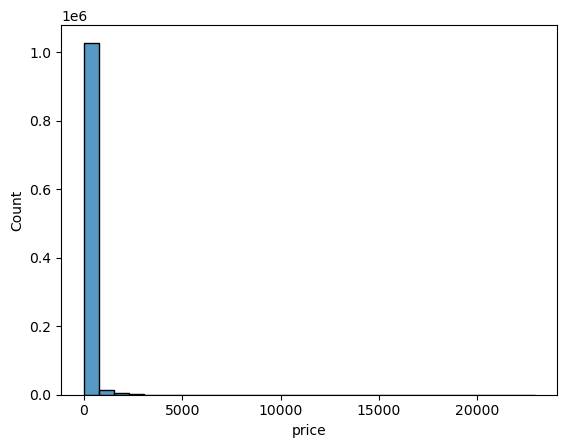

In [38]:
sns.histplot(num.price, bins=30) 

##### Box plots

Box plots, or whisker plots, showcase the central 50% of the data (interquartile range), potential outliers, and other statistical properties.

<Axes: >

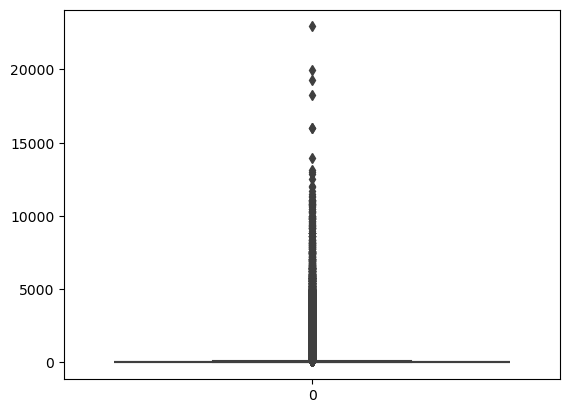

In [39]:
sns.boxplot(data=num.price)

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [40]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [41]:
df.stars

0          4.7
1          4.7
2          4.7
3          4.7
4          4.6
          ... 
1048570    4.2
1048571    4.4
1048572    3.9
1048573    0.0
1048574    3.8
Name: stars, Length: 1048575, dtype: float64

In [42]:
df.stars.mean()

2.0615116706005776

In [43]:
df.stars.median()

0.0

In [44]:
df.stars.mode()

0    0.0
Name: stars, dtype: float64

In [45]:
df.stars.max()

5.0

In [46]:
df.stars.min()

0.0

In [47]:
np.var(df.stars)

4.812410730577608

In [48]:
np.std(df.stars)

2.1937207503640037

In [49]:
df.stars.max() - df.stars.min()

5.0

In [50]:
q1 = np.percentile(df.stars, 25)
q3 = np.percentile(df.stars, 75)

In [51]:
q3-q1

4.4

In [52]:
df.stars.kurtosis().round(2)

-1.9

In [53]:
df.stars.skew().round(2)

0.17

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

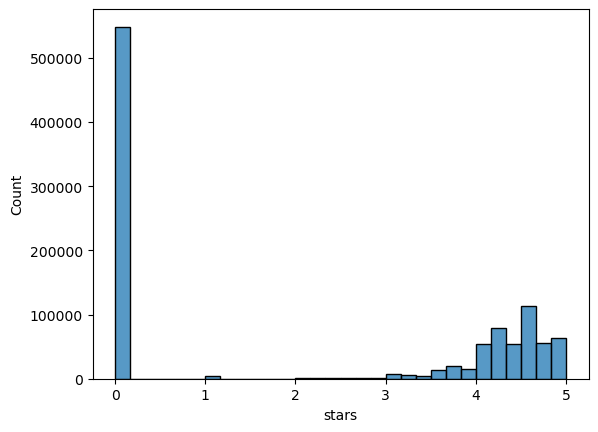

In [54]:
histplot_ratings = sns.histplot(df['stars'], bins=30)
histplot_ratings
     